# Sprint 4

## Instalação do PyCaret

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.9 MB/s eta 0:00:00
   ━━

## Importação das bibliotecas

In [3]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

## Criação do Dataset Sintético de Diagnósticos

In [ ]:
# Parâmetros para simulação
n_samples = 100000  # Número de amostras
aleatoriedade = 0.56  # Grau de aleatoriedade (10%)
n_variacoes = 5  # Alterar para 1 para apenas um ajuste aleatório

# Inicializando DataFrame
np.random.seed(42)  # Garantir reprodutibilidade
diagnosticos = np.random.choice([
    'Nenhum problema encontrado', 'Superaquecimento', 'Problema no Motor', 'Problema no sistema de combustível',
    'Problema nos freios', 'Problema no alinhamento', 'Problema na bateria', 'Problema no Ar-condicionado', 'Vazamento de óleo', 'Sistema de arrefecimento'],
    n_samples)

# Função para gerar características baseadas no diagnóstico com um pouco de aleatoriedade
def gerar_caracteristicas(diagnostico):
    if diagnostico == 'Superaquecimento':
        caracteristicas = [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
    elif diagnostico == 'Problema no Motor':
        caracteristicas = [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
    elif diagnostico == 'Problema no sistema de combustível':
        caracteristicas = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif diagnostico == 'Problema nos freios':
        caracteristicas = [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif diagnostico == 'Problema no alinhamento':
        caracteristicas = [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif diagnostico == 'Problema na bateria':
        caracteristicas = [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]
    elif diagnostico == 'Problema no Ar-condicionado':
        caracteristicas = [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif diagnostico == 'Vazamento de óleo':
        caracteristicas = [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
    elif diagnostico == 'Sistema de arrefecimento':
        caracteristicas = [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    else:  # Sem problema
        return [0] * 19  # Retorna uma lista de zeros se o diagnóstico for "Sem problema"

    # Introduzir aleatoriedade em um número limitado de características
    if n_variacoes > 0:
        indices = np.random.choice(range(len(caracteristicas)), n_variacoes, replace=False)
        for i in indices:
            if np.random.rand() < aleatoriedade:
                caracteristicas[i] = 1 - caracteristicas[i]  # Inverte o valor (0 -> 1, 1 -> 0)

    return caracteristicas

# Gerando dataset
data = []
for diagnostico in diagnosticos:
    caracteristicas = gerar_caracteristicas(diagnostico)
    data.append(caracteristicas + [diagnostico])

# Convertendo para DataFrame
columns = ['temperatura_alta', 'sons_estranhos', 'luz_painel', 'alto_consumo_combustivel',
           'dificuldade_partida', 'carro_vibrando', 'problemas_freio', 'problemas_direcao',
           'fumaca_escapamento', 'cheiros_incomuns', 'bateria_fraca', 'ar_nao_gelando',
           'vazamento', 'fumaca_capo', 'perda_potencia', 'problemas_eletricos', 'motor_falhando', 'volante_desalinhado', 'nivel_oleo', 'diagnostico']
dataset = pd.DataFrame(data, columns=columns)

# Exibir as primeiras linhas do dataset gerado
print(dataset.head())

   temperatura_alta  sons_estranhos  luz_painel  alto_consumo_combustivel  \
0                 0               0           1                         0   
1                 0               1           1                         1   
2                 0               1           0                         0   
3                 0               1           0                         0   
4                 0               1           1                         0   

   dificuldade_partida  carro_vibrando  problemas_freio  problemas_direcao  \
0                    1               1                0                  0   
1                    1               0                0                  0   
2                    0               0                0                  0   
3                    0               1                1                  0   
4                    0               0                0                  0   

   fumaca_escapamento  cheiros_incomuns  bateria_fraca  ar_nao_gelan

## Setup do PyCaret para obtenção do modelo

In [ ]:
s = setup(dataset, target = 'diagnostico', session_id=123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,diagnostico
2,Target type,Multiclass
3,Target mapping,"Nenhum problema encontrado: 0, Problema na bateria: 1, Problema no Ar-condicionado: 2, Problema no Motor: 3, Problema no alinhamento: 4, Problema no sistema de combustível: 5, Problema nos freios: 6, Sistema de arrefecimento: 7, Superaquecimento: 8, Vazamento de óleo: 9"
4,Original data shape,"(100000, 20)"
5,Transformed data shape,"(100000, 20)"
6,Transformed train set shape,"(80000, 20)"
7,Transformed test set shape,"(20000, 20)"
8,Numeric features,19
9,Preprocess,True


### **Obtendo melhor modelo:**
acreditamos que o Algoritmo de Classificação **Naive Bayes** tenha sido escolhido como o melhor por ser eficaz para problemas de classificação binária (0 e 1). Além disso, as características em geral são independentes entre si. Por mais que Light Gradient Boosting Machine e Extreme Gradient Boosting tenham empatado com Naive Bayes em AUC, ele ainda performou de forma superior a todos os outros modelos nas colunas restantes.

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9237,0.9963,0.9237,0.9241,0.9237,0.9153,0.9153,0.3920
lr,Logistic Regression,0.9227,0.0000,0.9227,0.9229,0.9227,0.9141,0.9142,2.4020
lightgbm,Light Gradient Boosting Machine,0.9227,0.9963,0.9227,0.9227,0.9226,0.9141,0.9141,28.1630
gbc,Gradient Boosting Classifier,0.9225,0.0000,0.9225,0.9226,0.9225,0.9139,0.9139,58.7760
xgboost,Extreme Gradient Boosting,0.9215,0.9963,0.9215,0.9215,0.9215,0.9128,0.9128,12.5020
svm,SVM - Linear Kernel,0.9207,0.0000,0.9207,0.9214,0.9207,0.9119,0.9120,1.3990
lda,Linear Discriminant Analysis,0.9185,0.0000,0.9185,0.9187,0.9184,0.9095,0.9095,0.4790
rf,Random Forest Classifier,0.9154,0.9913,0.9154,0.9155,0.9154,0.9060,0.9061,7.4090
knn,K Neighbors Classifier,0.9137,0.9844,0.9137,0.9135,0.9135,0.9041,0.9041,7.5400
et,Extra Trees Classifier,0.9117,0.9782,0.9117,0.9117,0.9116,0.9019,0.9019,8.4890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Criando modelo com base no melhor modelo obtido

In [ ]:
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9224,0.9963,0.9224,0.9228,0.9224,0.9137,0.9138
1,0.9262,0.9960,0.9262,0.9267,0.9262,0.9181,0.9181
2,0.9180,0.9960,0.9180,0.9185,0.9180,0.9089,0.9089
3,0.9280,0.9967,0.9280,0.9284,0.9280,0.9200,0.9200
4,0.9236,0.9964,0.9236,0.9238,0.9235,0.9151,0.9152
5,0.9218,0.9961,0.9218,0.9222,0.9216,0.9131,0.9131
6,0.9234,0.9963,0.9234,0.9234,0.9233,0.9149,0.9149
7,0.9218,0.9964,0.9218,0.9223,0.9218,0.9131,0.9131
8,0.9248,0.9964,0.9248,0.9256,0.9248,0.9164,0.9165


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tentativa de Tune no modelo (como o modelo anterior foi considerado melhor, continuaremos utilizando-o)

In [ ]:
model_tuned = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9224,0.9963,0.9224,0.9228,0.9224,0.9137,0.9138
1,0.9262,0.9960,0.9262,0.9267,0.9262,0.9181,0.9181
2,0.9180,0.9960,0.9180,0.9185,0.9180,0.9089,0.9089
3,0.9280,0.9967,0.9280,0.9284,0.9280,0.9200,0.9200
4,0.9236,0.9964,0.9236,0.9238,0.9235,0.9151,0.9152
5,0.9218,0.9961,0.9218,0.9222,0.9216,0.9131,0.9131
6,0.9234,0.9963,0.9234,0.9234,0.9233,0.9149,0.9149
7,0.9218,0.9964,0.9218,0.9223,0.9218,0.9131,0.9131
8,0.9248,0.9964,0.9248,0.9256,0.9248,0.9164,0.9165


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Avaliação do Modelo

In [ ]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predições médias do modelo

In [ ]:
predictions_model = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9258,0.9965,0.9258,0.9262,0.9258,0.9176,0.9177


### Testando o modelo e obtendo predições

In [ ]:
novo_df = dataset.copy().drop('diagnostico', axis=1)
predictions = predict_model(model, data=novo_df)

In [ ]:
predictions

,temperatura_alta,sons_estranhos,luz_painel,alto_consumo_combustivel,dificuldade_partida,carro_vibrando,problemas_freio,problemas_direcao,fumaca_escapamento,cheiros_incomuns,...,ar_nao_gelando,vazamento,fumaca_capo,perda_potencia,problemas_eletricos,motor_falhando,volante_desalinhado,nivel_oleo,prediction_label,prediction_score
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,Problema na bateria,1.0000
1,0,1,1,1,1,0,0,0,1,1,...,1,0,0,1,0,1,0,0,Problema no Motor,0.5309
2,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,Problema no Ar-condicionado,0.9995
3,0,1,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,Problema nos freios,0.9960
4,0,1,1,0,0,0,0,0,1,1,...,0,0,0,1,1,1,0,0,Problema na bateria,0.9903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,Problema nos freios,1.0000
99996,1,0,1,1,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,Problema no sistema de combustível,0.9969
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nenhum problema encontrado,1.0000
99998,0,0,1,1,1,1,0,0,1,1,...,0,1,0,0,1,1,1,0,Problema no sistema de combustível,0.9997


### Classification Report do Modelo

In [ ]:
print(classification_report(dataset['diagnostico'], predictions['prediction_label']))

                                    precision    recall  f1-score   support

        Nenhum problema encontrado       1.00      1.00      1.00      9974
               Problema na bateria       0.95      0.97      0.96     10104
       Problema no Ar-condicionado       0.92      0.92      0.92      9925
                 Problema no Motor       0.95      0.89      0.92      9886
           Problema no alinhamento       0.94      0.93      0.93     10054
Problema no sistema de combustível       0.90      0.93      0.91      9984
               Problema nos freios       0.89      0.91      0.90      9975
          Sistema de arrefecimento       0.87      0.86      0.86     10156
                  Superaquecimento       0.92      0.93      0.93      9911
                 Vazamento de óleo       0.91      0.91      0.91     10031

                          accuracy                           0.92    100000
                         macro avg       0.93      0.92      0.92    100000
          

### Matriz de Confusão

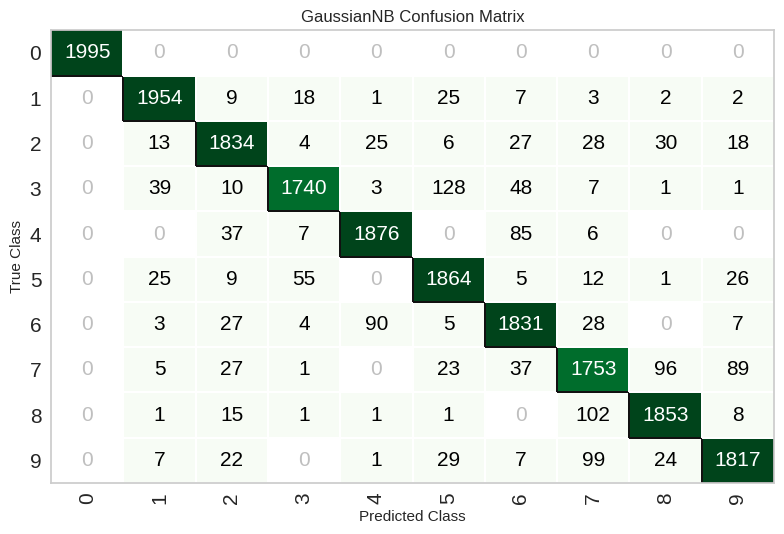

In [ ]:
plot_model(model, plot='confusion_matrix')

Salvando o modelo em um arquivo .pkl

In [ ]:
save_model(model, 'nb_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['temperatura_alta',
                                              'sons_estranhos', 'luz_painel',
                                              'alto_consumo_combustivel',
                                              'dificuldade_partida',
                                              'carro_vibrando',
                                              'problemas_freio',
                                              'proble...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                  